In [1]:
import pyreadstat
import pandas as pd

In [2]:
df = pd.read_parquet("PISA_2022_cleaned.parquet")

df = df.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values if any conversion failed
df.dropna(inplace=True)

In [3]:
df.head()

,one-on-one,IKT,video,small_group,large_group,none,spol,letnik
481056,0.0,0.0,0.0,0.0,0.0,1.0,1.0,10.0
481057,0.0,0.0,0.0,0.0,1.0,0.0,1.0,10.0
481058,0.0,0.0,0.0,0.0,0.0,1.0,2.0,10.0
481059,0.0,0.0,1.0,0.0,0.0,1.0,2.0,10.0
481060,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0


ANALIZA

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [5]:
columns_for_clustering = ["one-on-one", "IKT", "video", "small_group", "large_group", "none"]
X = df[columns_for_clustering]

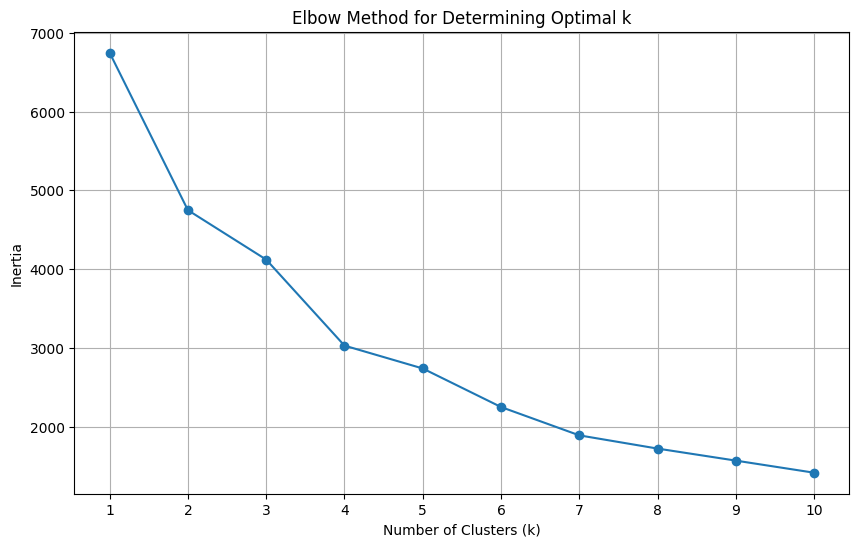

In [6]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plotting the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Determining Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

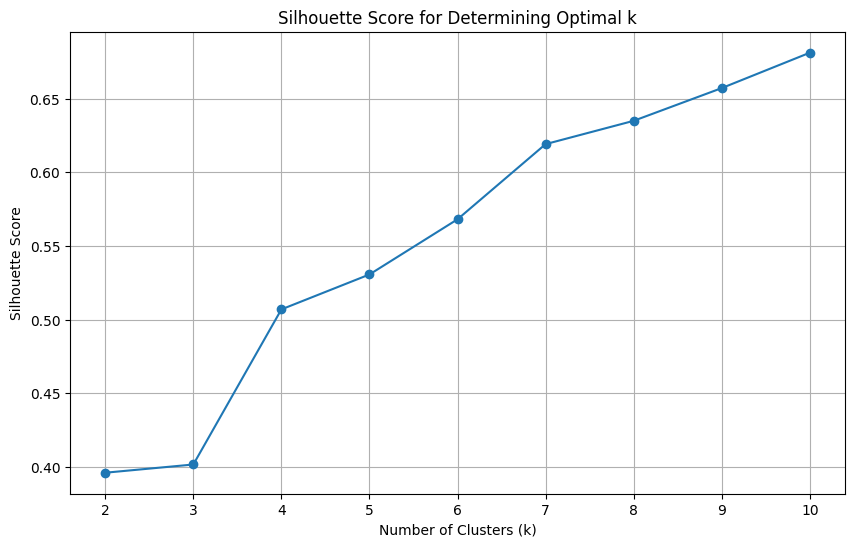

In [7]:
from sklearn.metrics import silhouette_score

# Silhouette scores
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Determining Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()


In [8]:
X.head()

,one-on-one,IKT,video,small_group,large_group,none
481056,0.0,0.0,0.0,0.0,0.0,1.0
481057,0.0,0.0,0.0,0.0,1.0,0.0
481058,0.0,0.0,0.0,0.0,0.0,1.0
481059,0.0,0.0,1.0,0.0,0.0,1.0
481060,1.0,0.0,0.0,0.0,0.0,0.0


In [10]:
"""sas_file_path = 'cy08msp_stu_qqq.sas7bdat'
df, meta = pyreadstat.read_sas7bdat(sas_file_path)

# Export to Parquet
parquet_file_path = 'PISA_2022.parquet'
df.to_parquet(parquet_file_path, engine='pyarrow')"""

In [11]:
df = pd.read_parquet("PISA_2022.parquet")
column_rename_map = {
    'ST297Q01JA': 'one-on-one',
    'ST297Q03JA': 'IKT',
    'ST297Q05JA': 'video',
    'ST297Q06JA': 'small_group',
    'ST297Q07JA': 'large_group',
    'ST297Q09JA': 'none',
}

# Renaming the columns
df.rename(columns=column_rename_map, inplace=True)
columns_for_clustering = ["one-on-one", "IKT", "video", "small_group", "large_group", "none"]
X1 = df[columns_for_clustering]
X1.head()

,one-on-one,IKT,video,small_group,large_group,none
0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0


In [14]:
from scipy.stats import chi2_contingency
data_a = X
data_b = X1

# Label datasets
data_a['Dataset'] = 'A'
data_b['Dataset'] = 'B'

# Combine datasets
combined_data = pd.concat([data_a, data_b])

# Calculate proportions
method_columns = ['one-on-one', 'IKT', 'video', 'small_group', 'large_group', 'none']
proportions = combined_data.groupby('Dataset')[method_columns].mean()

# Print proportions for reference
print("Proportions in each dataset:")
print(proportions)

# Chi-square test for each method
for method in method_columns:
    contingency_table = pd.crosstab(combined_data['Dataset'], combined_data[method])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"\nMethod: {method}")
    print(f"Chi-square: {chi2}, p-value: {p}")

C:\Users\borbr\AppData\Local\Temp\ipykernel_10800\742442824.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_b['Dataset'] = 'B'


Proportions in each dataset:
         one-on-one       IKT     video  small_group  large_group      none
Dataset                                                                    
A          0.255075  0.215264  0.277105     0.209599     0.097561  0.466719
B          0.249550  0.229839  0.222718     0.225046     0.150907  0.437274

Method: one-on-one
Chi-square: 0.9950595144315012, p-value: 0.3185089211100949

Method: IKT
Chi-square: 7.465822077776932, p-value: 0.006288131018205453

Method: video
Chi-square: 106.89810923152467, p-value: 4.68655556359998e-25

Method: small_group
Chi-square: 8.517343091246408, p-value: 0.003517776989724007

Method: large_group
Chi-square: 139.63785084017778, p-value: 3.1945383211200596e-32

Method: none
Chi-square: 22.027099533089533, p-value: 2.6882795338615735e-06
